In [134]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings 
warnings.filterwarnings('ignore') 

In [136]:
net=pd.read_csv(r"C:\Users\ACER\Downloads\Telegram Desktop\Netflix Dataset 1.csv") 

In [138]:
net.shape

(7789, 11)

In [140]:
net.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7789 entries, 0 to 7788
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Show_Id       7789 non-null   object
 1   Category      7789 non-null   object
 2   Title         7789 non-null   object
 3   Director      5401 non-null   object
 4   Cast          7071 non-null   object
 5   Country       7282 non-null   object
 6   Release_Date  7779 non-null   object
 7   Rating        7782 non-null   object
 8   Duration      7789 non-null   object
 9   Type          7789 non-null   object
 10  Description   7789 non-null   object
dtypes: object(11)
memory usage: 669.5+ KB


In [142]:
net.columns

Index(['Show_Id', 'Category', 'Title', 'Director', 'Cast', 'Country',
       'Release_Date', 'Rating', 'Duration', 'Type', 'Description'],
      dtype='object')

In [144]:
net.head()

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...


# DATA CLEANING

In [147]:
net.isnull().sum()[net.isnull().sum()>0]

Director        2388
Cast             718
Country          507
Release_Date      10
Rating             7
dtype: int64

In [151]:
net = net[net[['Release_Date', 'Rating']].notna().all(axis=1)]

In [153]:
net.isnull().sum()[net.isnull().sum()>0]

Director    2375
Cast         718
Country      505
dtype: int64

In [155]:
net.Director.unique()

array([nan, 'Jorge Michel Grau', 'Gilbert Chan', ..., 'Josef Fares',
       'Mozez Singh', 'Sam Dunn'], dtype=object)

In [157]:
net['Director'] = net['Director'].fillna('not_available')
net['Country']=net['Country'].fillna('unknown_country')

In [159]:
net.columns = [c.strip().lower().replace(" ", "_") for c in net.columns]

In [161]:
net['release_date'] = pd.to_datetime(net['release_date'], errors='coerce')
net['release_year'] = net['release_date'].dt.year

In [163]:
net['genres_list'] = net['type'].astype(str).apply(lambda x: [g.strip() for g in x.split(",")])

# Split country column into list (some titles have multiple countries)
net['country_list'] = net['country'].astype(str).apply(lambda x: [c.strip() for c in x.split(",")])

# EXPLORATORY DATA ANALYSIS

In [166]:
# 3a. Total Movies vs TV Shows
movies_count = net[net['category'] == "Movie"].shape[0]
tv_count = net[net['category'] == "TV Show"].shape[0]
print("Total Movies:", movies_count)
print("Total TV Shows:", tv_count)

# 3b. Most common genres
from collections import Counter
all_genres = [g for sublist in net['genres_list'] for g in sublist]
genre_counts = Counter(all_genres).most_common(10)
print("\nTop 10 Genres:")
print(genre_counts)

# 3c. Country contributions
all_countries = [c for sublist in net['country_list'] for c in sublist]
country_counts = Counter(all_countries).most_common(10)
print("\nTop 10 Countries:")
print(country_counts)


Total Movies: 5374
Total TV Shows: 2398

Top 10 Genres:
[('International Movies', 2437), ('Dramas', 2107), ('Comedies', 1472), ('International TV Shows', 1197), ('Documentaries', 786), ('Action & Adventure', 721), ('TV Dramas', 703), ('Independent Movies', 675), ('Children & Family Movies', 532), ('Romantic Movies', 531)]

Top 10 Countries:
[('United States', 3289), ('India', 990), ('United Kingdom', 722), ('unknown_country', 505), ('Canada', 412), ('France', 349), ('Japan', 285), ('Spain', 215), ('South Korea', 212), ('Germany', 199)]


# VISUALISATION

# A. MOVIES AND TV SHOWS

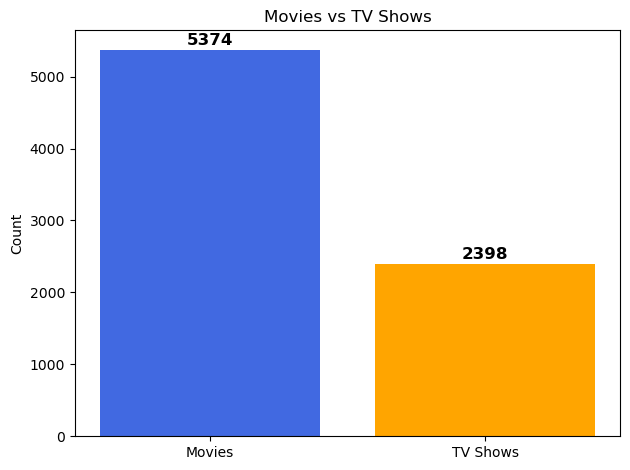

In [170]:
categories = ["Movies", "TV Shows"]
counts = [movies_count, tv_count]
colors = ['royalblue', 'orange']

# Create bar chart with colors
plt.bar(categories, counts, color=colors)
plt.title("Movies vs TV Shows")
plt.ylabel("Count")

# Add count labels on top of each bar
for i, count in enumerate(counts):
    plt.text(i, count + 30, str(count), ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()


# B. TOP 10 GENRES

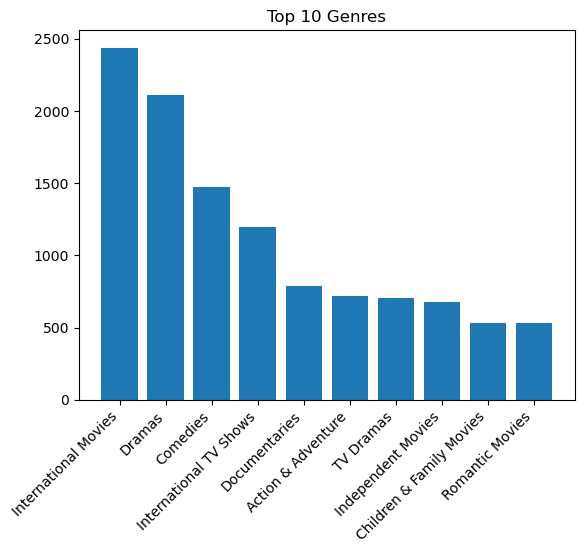

In [173]:
genres, counts = zip(*genre_counts)
plt.bar(genres, counts)
plt.xticks(rotation=45, ha="right")
plt.title("Top 10 Genres")
plt.show()

# C. TOP 10 COUNTRIES

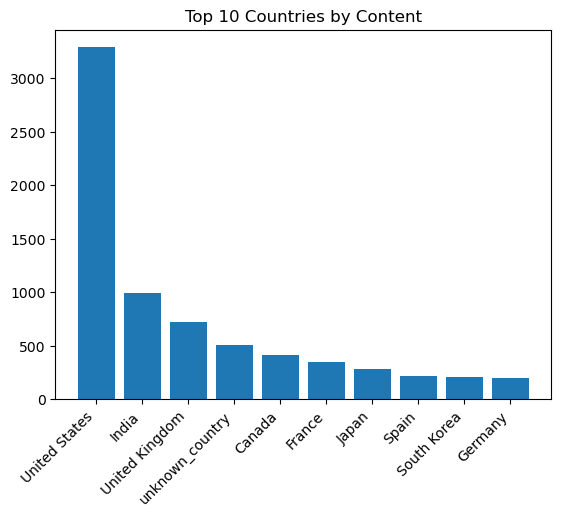

In [176]:
countries, counts = zip(*country_counts)
plt.bar(countries, counts)
plt.xticks(rotation=45, ha="right")
plt.title("Top 10 Countries by Content")
plt.show()

# EXTRAS
# MORE ANALYSIS WHAT WE CAN DO FOR THE GREATER IMPACT 

# Movies and TV Shows per year

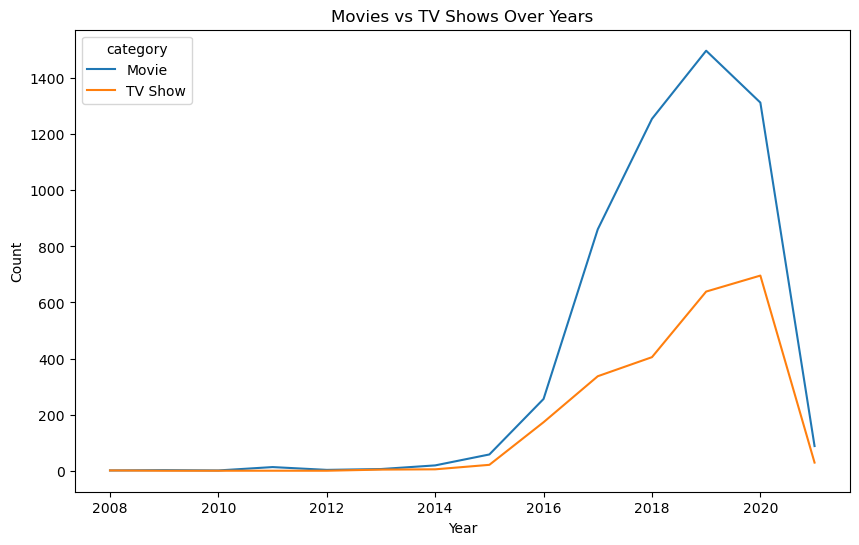

In [185]:
type_year = net.groupby(['release_year','category']).size().unstack(fill_value=0)
type_year.plot(figsize=(10,6))
plt.title("Movies vs TV Shows Over Years")
plt.ylabel("Count")
plt.xlabel("Year")
plt.show()

# Country Contributions Over Years

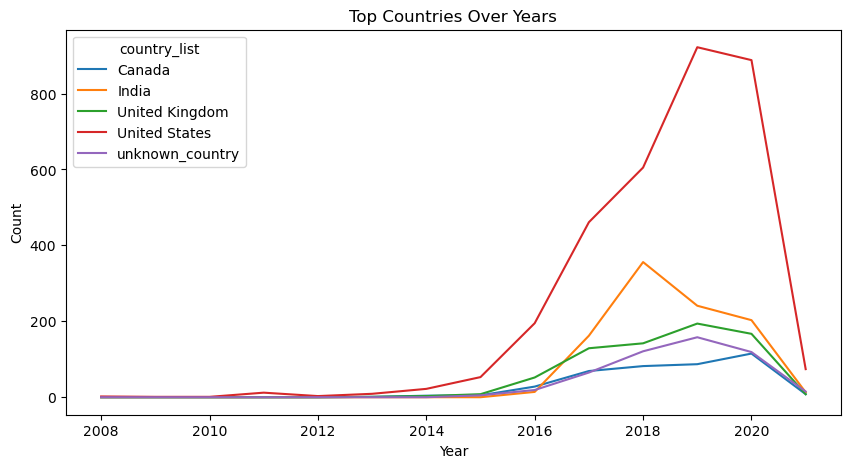

In [202]:
# country list
net_country = net.explode('country_list')

from collections import Counter
top_countries = [c for c,_ in Counter([c for sub in net['country_list'] for c in sub]).most_common(5)]

country_year = net_country[net_country['country_list'].isin(top_countries)]
country_year_count = country_year.groupby(['release_year','country_list']).size().unstack(fill_value=0)
country_year_count.plot(figsize=(10,5))
plt.title("Top Countries Over Years")
plt.ylabel("Count")
plt.xlabel("Year")
plt.show()

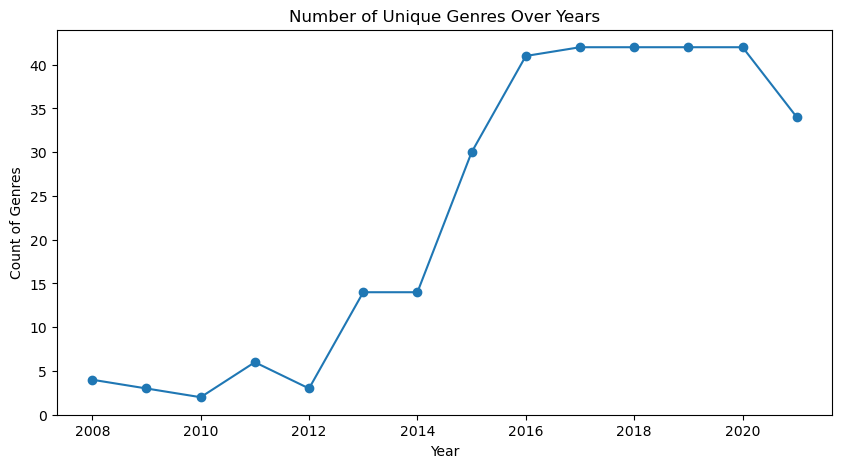

In [190]:
# Explode genres column to have one genre per row
net_genres = net.explode('genres_list')

# no of unique genres per year
genre_diversity = net_genres.groupby('release_year')['genres_list'].nunique()

genre_diversity.plot(marker='o', figsize=(10,5))
plt.title("Number of Unique Genres Over Years")
plt.ylabel("Count of Genres")
plt.xlabel("Year")
plt.show()


# ADAVANCED IMPACT

# sentiment analysis

In [204]:
from textblob import TextBlob

net['sentiment'] = net['description'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)
net.groupby('category')['sentiment'].mean()

category
Movie      0.052306
TV Show    0.086268
Name: sentiment, dtype: float64

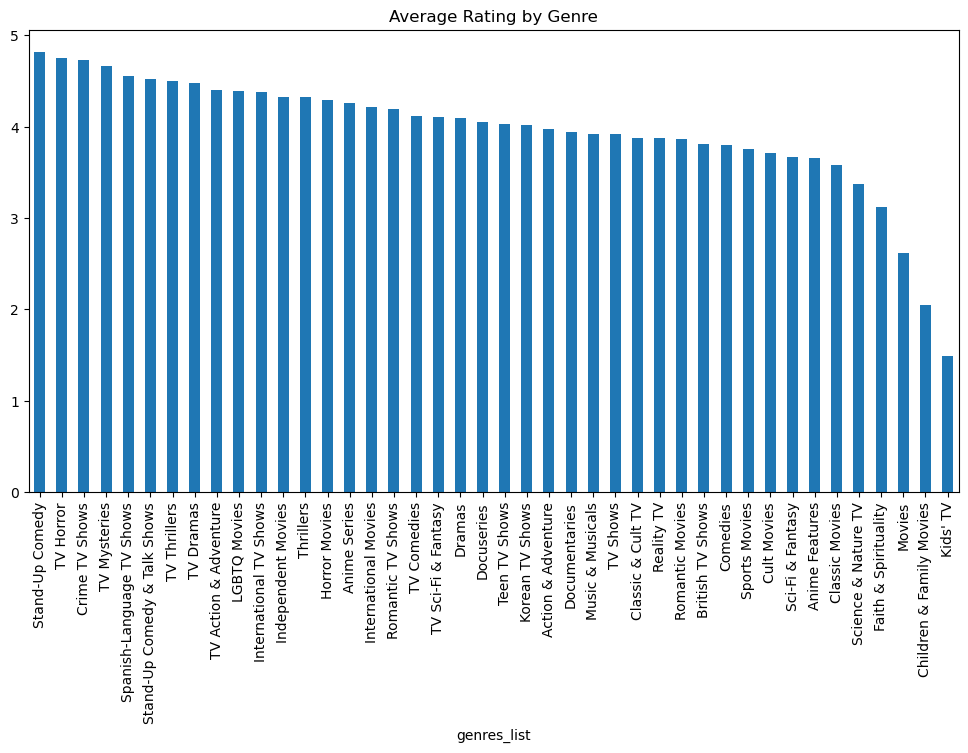

In [205]:
# Example (simplified)
net_genres = net.explode('genres_list')
rating_map = {'TV-Y':1,'TV-G':2,'TV-PG':3,'TV-14':4,'TV-MA':5,'PG':2,'PG-13':3,'R':4,'NC-17':5,'NR':3}
net_genres['rating_num'] = net_genres['rating'].map(rating_map)
genre_rating = net_genres.groupby('genres_list')['rating_num'].mean().sort_values(ascending=False)
genre_rating.plot(kind='bar', figsize=(12,6))
plt.title("Average Rating by Genre")
plt.show()

In [221]:
from collections import Counter

# Function to get top genres per cluster
def top_genres(cluster_num, top_n=5):
    cluster_data = net[net['cluster'] == cluster_num]
    all_genres = cluster_data['genres_list'].explode()  # flatten lists
    top = Counter(all_genres).most_common(top_n)
    return top

# Print top genres for each cluster
for i in range(net['cluster'].nunique()):
    print(f"Cluster {i} top genres: {top_genres(i)}")


Cluster 0 top genres: [('Documentaries', 782), ('International Movies', 634), ("Kids' TV", 411), ('Action & Adventure', 368), ('Stand-Up Comedy', 329)]
Cluster 1 top genres: [('Comedies', 1116), ('International Movies', 489), ('Romantic Movies', 245), ('Children & Family Movies', 214), ('Action & Adventure', 161)]
Cluster 2 top genres: [('Dramas', 433), ('Children & Family Movies', 297), ('Thrillers', 78), ('Romantic Movies', 66), ('Action & Adventure', 61)]
Cluster 3 top genres: [('Dramas', 1593), ('International Movies', 1312), ('Independent Movies', 530), ('Comedies', 345), ('Romantic Movies', 173)]
Cluster 4 top genres: [('International TV Shows', 1197), ('TV Dramas', 639), ('Crime TV Shows', 339), ('Romantic TV Shows', 313), ('TV Comedies', 261)]


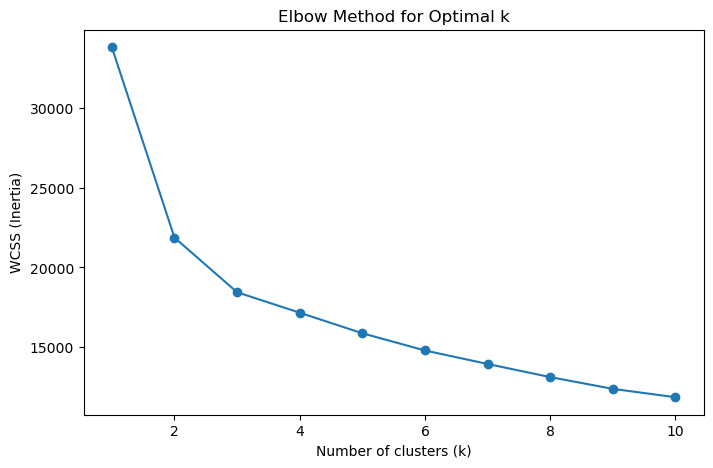

In [210]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Convert genres_list to strings (so CountVectorizer can work)
net['genres_str'] = net['genres_list'].apply(lambda x: ' '.join(x))

# Vectorize genres
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(net['genres_str'])

# Elbow method to find optimal k
wcss = []
K = range(1, 11)  # try 1 to 10 clusters
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)  # WCSS = inertia_

# Plotting the elbow
plt.figure(figsize=(8,5))
plt.plot(K, wcss, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS (Inertia)')
plt.title('Elbow Method for Optimal k')
plt.show()


In [212]:
# Explode genres_list into separate rows
net_exploded = net.explode('genres_list')

# Create one-hot encoded genre columns
genre_dummies = pd.get_dummies(net_exploded['genres_list'])

# Aggregate back by show_id to avoid duplicates
X = genre_dummies.groupby(net_exploded['show_id']).max()


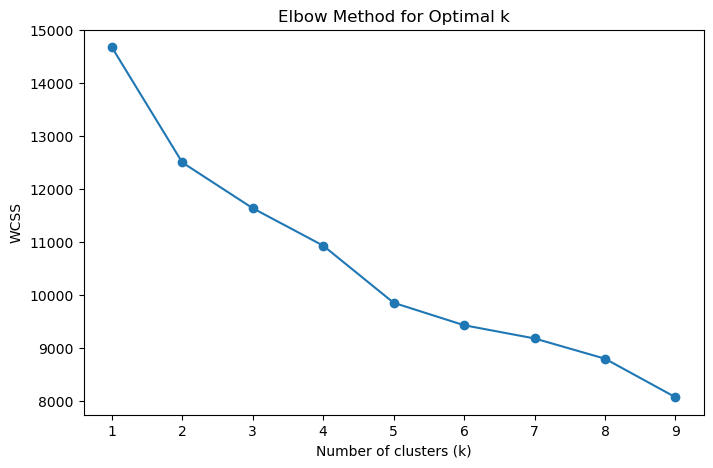

In [214]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []
K_range = range(1, 10)  

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(K_range, wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.xticks(K_range)
plt.show()


In [216]:
from sklearn.metrics import silhouette_score

for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    print(f"k={k}, Silhouette Score={score:.3f}")


k=2, Silhouette Score=0.157
k=3, Silhouette Score=0.149
k=4, Silhouette Score=0.164
k=5, Silhouette Score=0.186
k=6, Silhouette Score=0.194
k=7, Silhouette Score=0.186
k=8, Silhouette Score=0.202
k=9, Silhouette Score=0.230


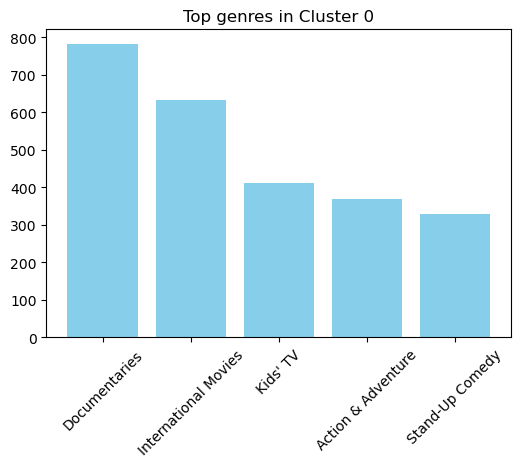

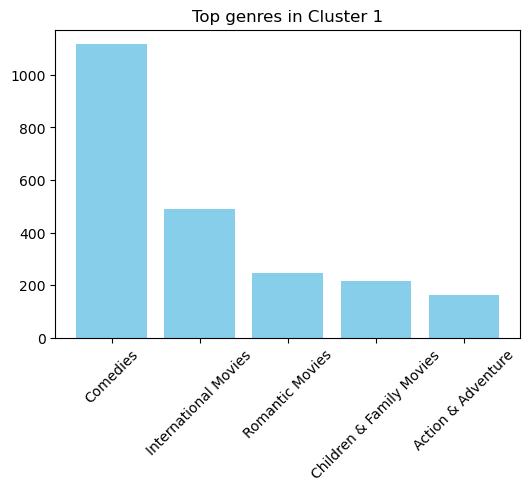

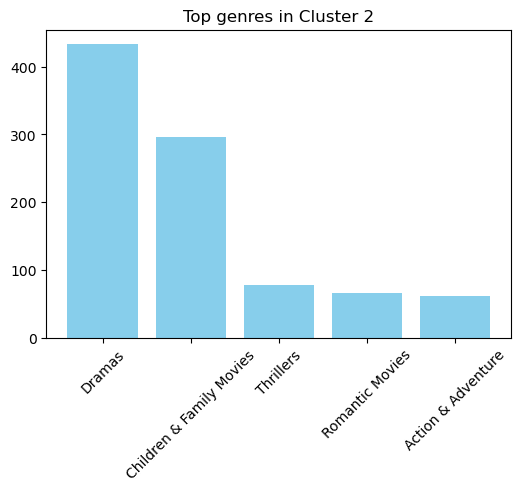

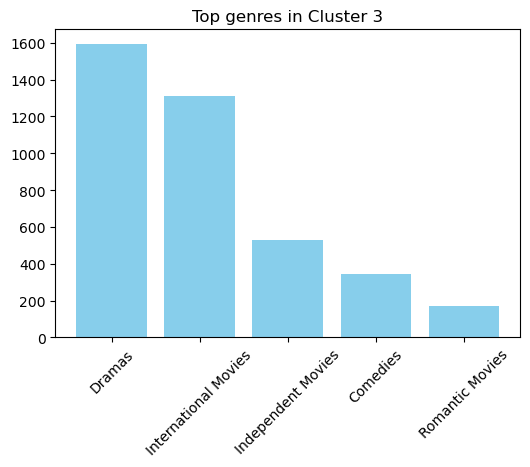

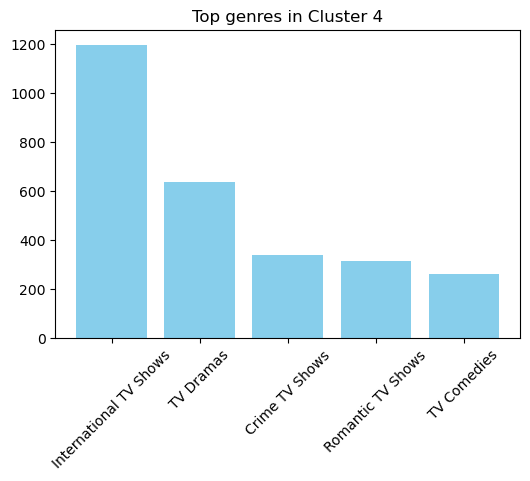

In [218]:
from collections import Counter
import matplotlib.pyplot as plt

# Run KMeans
kmeans = KMeans(n_clusters=5, random_state=42)
net['cluster'] = kmeans.fit_predict(X.loc[net['show_id']])

# Plot top genres per cluster
for i in range(5):
    cluster_data = net[net['cluster'] == i]
    all_genres = cluster_data['genres_list'].explode()
    top = Counter(all_genres).most_common(5)
    
    genres, counts = zip(*top)
    plt.figure(figsize=(6,4))
    plt.bar(genres, counts, color='skyblue')
    plt.title(f"Top genres in Cluster {i}")
    plt.xticks(rotation=45)
    plt.show()
